## Observations and Insights 

In [68]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#create the dataframes for both data sets
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

In [3]:
# Combine the data into a single dataset
merge_mouse_df = pd.merge(mouse_df, study_df, on="Mouse ID")
merge_mouse_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
mice_count = merge_mouse_df["Mouse ID"].nunique()
mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merge_mouse_df.sort_values("Mouse ID", inplace = True)
duplicate_mouse_df = merge_mouse_df[merge_mouse_df.duplicated(["Mouse ID", "Timepoint", "Tumor Volume (mm3)"])]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_mouse_df.loc[merge_mouse_df["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
914,g989,Propriva,Female,21,26,15,51.325852,1
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
920,g989,Propriva,Female,21,26,35,62.570880,2
919,g989,Propriva,Female,21,26,30,59.082294,1
918,g989,Propriva,Female,21,26,25,56.045564,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#clean the data from duplicate mouse data
# clean_merged_df = merge_mouse_df.drop(IndexMouse , inplace=True)
# print(clean_merged_df)

 # Get names of indexes for which column Age has value 30
indexMouse = merge_mouse_df[merge_mouse_df['Mouse ID'] == "g989"].index
    
# Delete these row indexes from dataFrame
clean_dataframe = merge_mouse_df.drop(indexMouse, inplace=False)
clean_merge_df = pd.DataFrame(clean_dataframe)
clean_merge_df.head()
    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = clean_merge_df["Mouse ID"].nunique()
mice_count_clean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
#created all needed series
grouped_data_df = clean_merge_df.groupby(["Drug Regimen"])
mean_data = grouped_data_df["Tumor Volume (mm3)"].mean()
median_data = grouped_data_df["Tumor Volume (mm3)"].median()
var_data = grouped_data_df["Tumor Volume (mm3)"].var()
stdev_data = grouped_data_df["Tumor Volume (mm3)"].std()
sem_data = grouped_data_df["Tumor Volume (mm3)"].sem()

#created a new summary dataframe from the listed above series
series = [mean_data, median_data, var_data, stdev_data, sem_data]
col_names = ["Mean", "Median", "Var_Data", "StDev_Data", "SEM"]
summary_df = pd.concat(series, axis=1, keys=col_names)
summary_df

,Mean,Median,Var_Data,StDev_Data,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_2_df =clean_merge_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [62]:
#groupby by timepoint: created the database as a basis for the plot
grouped_timep = clean_merge_df.groupby(["Drug Regimen", "Timepoint"]).agg({"Mouse ID": ["value_counts"]})
grouped_timep_df = pd.DataFrame(grouped_timep)
# unstack the dataframe
unstacked_tp_df = grouped_timep_df.unstack(2)
sum_column = unstacked_tp_df.sum(axis=1)
sum_column_df = pd.DataFrame(sum_column, columns = ["Mice_Count"])
sum_column_df

Mice_Count
Drug Regimen Timepoint            
Capomulin    0                25.0
             5                25.0
             10               25.0
             15               24.0
             20               23.0
...                            ...
Zoniferol    25               16.0
             30               15.0
             35               14.0
             40               14.0
             45               14.0

[100 rows x 1 columns]

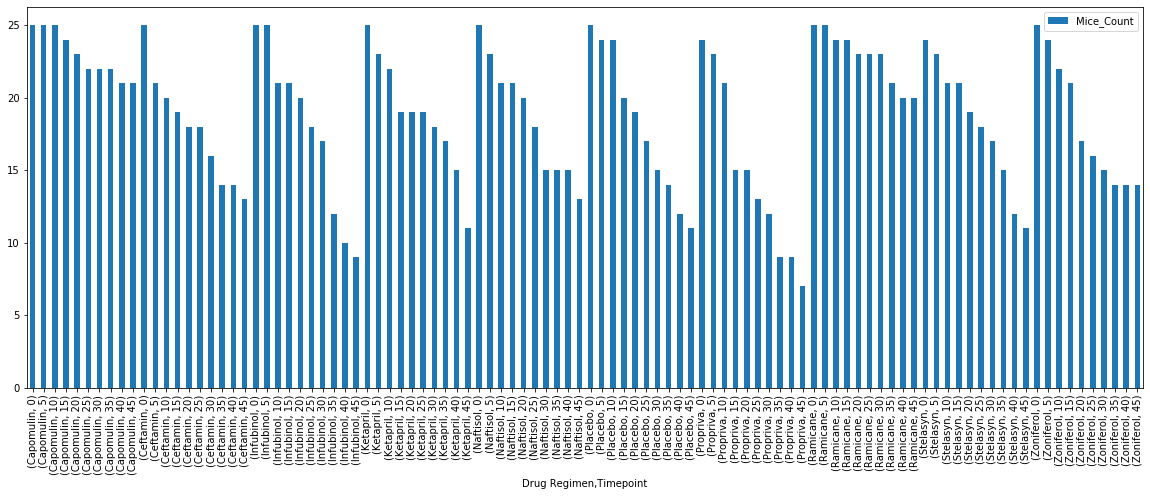

In [67]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_plot1 = sum_column_df.plot.bar(y="Mice_Count", figsize=(20,7)) 

In [74]:
#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
sum_column_df.plt.bar("Mice_Count", color='r', alpha=0.5, align="center")

AttributeError: 'DataFrame' object has no attribute 'plt'

## Pie Plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
